# **Bottle Deep Learning Version**

**Benedictus Bayu Pramudhito**

**Deeper, Wider, Wider SGD, Wider RMSprop**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)')))

bottle.csv
References
Untitled0.ipynb
Week_1_Python_1.ipynb
heart.csv
pima-indians-diabetes.csv
sonar.csv
housing.csv
winequality-white.csv
auto.csv
sales.csv
birth.csv
shampoo.csv
daily-min-temperatures.csv
Quiz
customer.csv
iris.csv
iris (1).csv
Bootcamp Images
parkinsons
numbers_dataset
bottle-updated.csv
auto-mpg.csv
auto (1).csv


In [ ]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/bottle-updated.csv')
df.head()

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


In [ ]:
df.shape

(864863, 4)

In [ ]:
df.dtypes

Unnamed: 0      int64
Depthm          int64
T_degC        float64
Salnty        float64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,864863.0,432431.000000,249664.587267,0.000,216215.500,432431.000,648646.5000,864862.000
Depthm,864863.0,226.831951,316.050259,0.000,46.000,125.000,300.0000,5351.000
T_degC,853900.0,10.799677,4.243825,1.440,7.680,10.060,13.8800,31.140
Salnty,817509.0,33.840350,0.461843,28.431,33.488,33.863,34.1969,37.034


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,Depthm,T_degC,Salnty
0,0,10.50,33.440
1,8,10.46,33.440
2,10,10.46,33.437
3,19,10.45,33.420
4,20,10.45,33.421


In [ ]:
print(df.dtypes)
df.shape

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object


(864863, 3)

In [ ]:
nulls = df.isnull().sum().sort_values(ascending=False)
percent = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percent.values

df_null

,Features,Total,Percent
0,Salnty,47354,5.48
1,T_degC,10963,1.27
2,Depthm,0,0.00


In [ ]:
#Isi missing values
for i in df.columns:
  if df[i].isnull().sum() > 0:
    df[i].fillna(df[i].mode().mean(), inplace=True)
    print('Filled', i)

Filled T_degC
Filled Salnty


In [ ]:
#Cek ulang missing valuesnya
nulls = df.isnull().sum().sort_values(ascending=False)
percent = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percent.values

df_null

,Features,Total,Percent
0,Salnty,0,0.0
1,T_degC,0,0.0
2,Depthm,0,0.0


In [ ]:
df.dtypes

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object

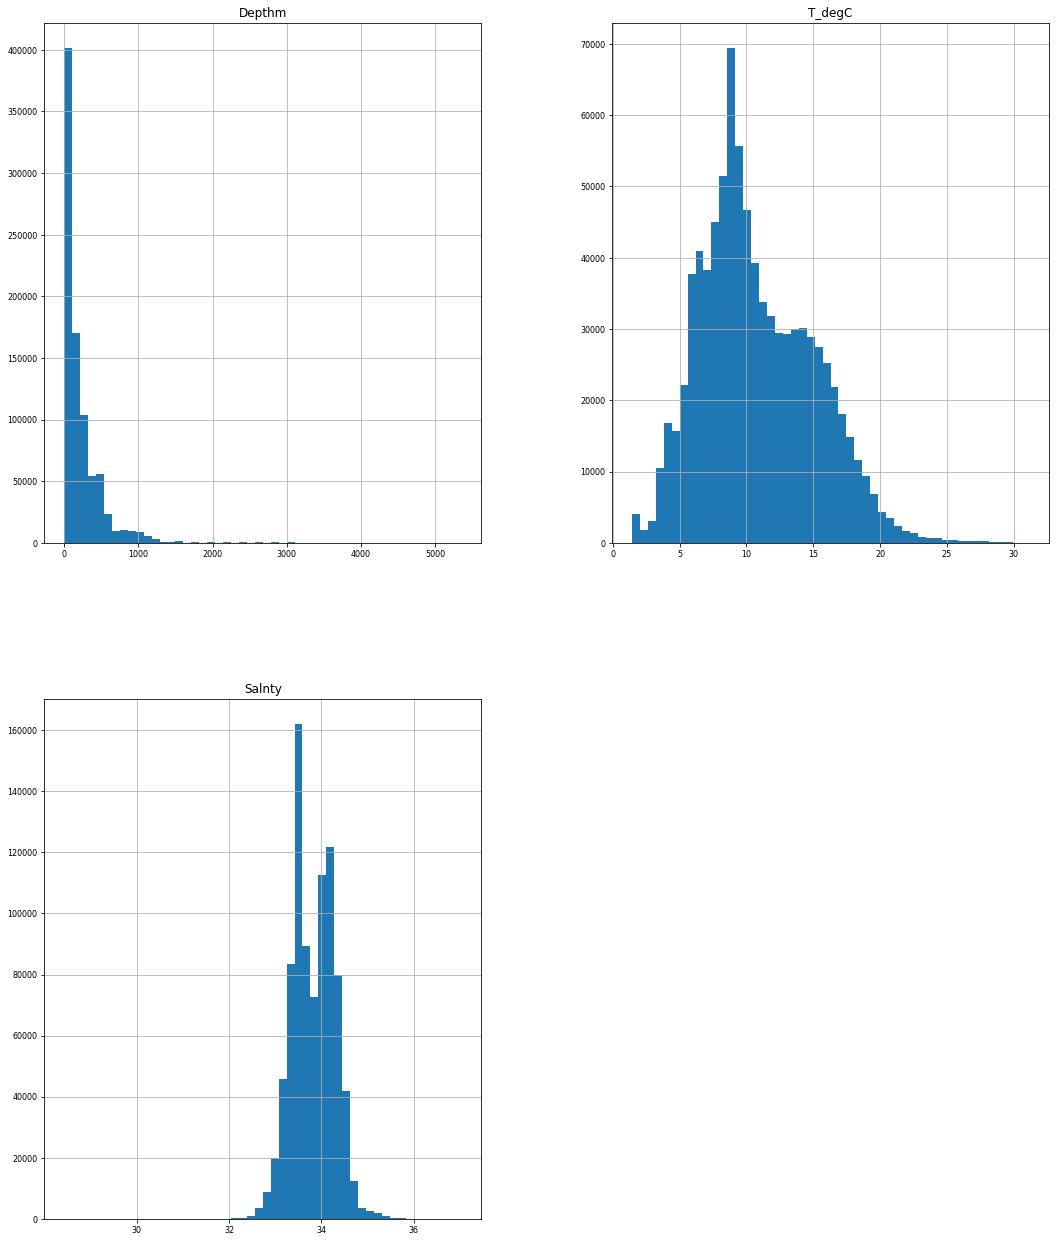

In [ ]:
df_numbers = df.select_dtypes(include=['float64', 'int64'])

df_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

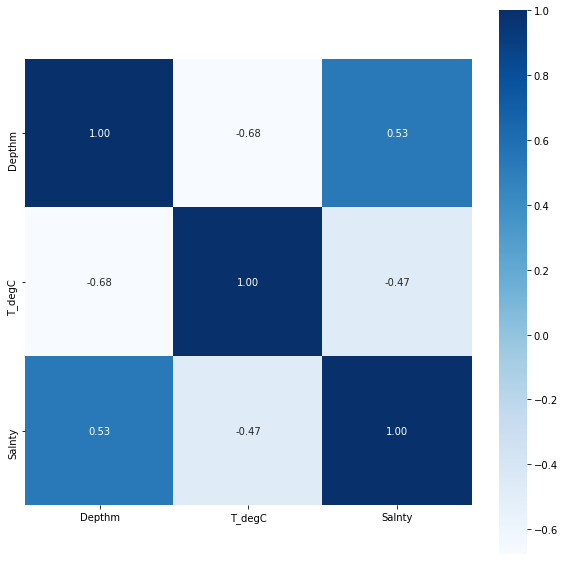

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, cbar=True, square=True, fmt='.2f', cmap='Blues')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X = df.drop(['Salnty'], axis=1)
y = df['Salnty']

In [ ]:
stdr = StandardScaler()

X = stdr.fit_transform(X.values)
y = stdr.fit_transform(df['Salnty'].values.reshape(-1, 1)).flatten()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

## **Deep Learning Model with Deeper Layer**

In [ ]:
def plot_loss_new(history):
  history_df = pd.DataFrame(history.history)

  min_loss_index = history_df[history_df['loss']==min(history_df['loss'])].index.values
  min_loss = history_df.loc[min_loss_index]['loss']
  min_val_loss_index = history_df[history_df['val_loss']==min(history_df['val_loss'])].index.values
  min_val_loss = history_df.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  print('Minimum Loss             :', min_loss)
  print()
  print('Minimum Validation Loss  :', min_val_loss)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history1 = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
81081/81081 [==============================] - 59s 733us/step - loss: 0.3795 - val_loss: 0.3771
Epoch 2/50
81081/81081 [==============================] - 61s 752us/step - loss: 0.3703 - val_loss: 0.3735
Epoch 3/50
81081/81081 [==============================] - 64s 787us/step - loss: 0.3691 - val_loss: 0.3711
Epoch 4/50
81081/81081 [==============================] - 66s 817us/step - loss: 0.3675 - val_loss: 0.3703
Epoch 5/50
81081/81081 [==============================] - 66s 817us/step - loss: 0.3666 - val_loss: 0.3694
Epoch 6/50
81081/81081 [==============================] - 62s 771us/step - loss: 0.3659 - val_loss: 0.3675
Epoch 7/50
81081/81081 [==============================] - 63s 781us/step - loss: 0.3649 - val_loss: 0.3715
Epoch 8/50
81081/81081 [==============================] - 63s 781us/step - loss: 0.3647 - val_loss: 0.3693
Epoch 9/50
81081/81081 [==============================] - 59s 727us/step - loss: 0.3643 - val_loss: 0.3722
Epoch 10/50
81081/81081 [============

In [ ]:
predict_deep = model.predict(X_test)
predict_deep = predict_deep.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_deep)
mae = mean_absolute_error(y_test, predict_deep)
r2 = r2_score(y_test, predict_deep)
print("MSE (Mean Squared Error)         :", mse)
print("MAE (Mean Absolute Error)        :", mae)
print("r^2 score                        :", r2)
print('RMSE (Root Mean Squared Error)   :', np.sqrt(mean_squared_error(y_test, predict_deep)))

MSE (Mean Squared Error)         : 0.36658837137918476
MAE (Mean Absolute Error)        : 0.40685436452044454
r^2 score                        : 0.6343415821778486
RMSE (Root Mean Squared Error)   : 0.6054654171620248


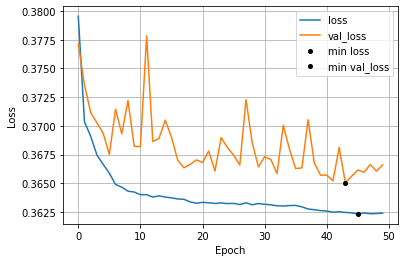

Minimum Loss             : 45    0.362327
Name: loss, dtype: float64

Minimum Validation Loss  : 43    0.365038
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history1)

Sweet spot berada pada epoch 43 dengan val_loss 0.365038

## **Deep Learning with Wider Layer**

In [ ]:
wider = Sequential()
wider.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider.add(Dense(1, kernel_initializer='normal'))

wider.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
wider.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = wider.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
81081/81081 [==============================] - 51s 626us/step - loss: 0.4103 - val_loss: 0.3995
Epoch 2/50
81081/81081 [==============================] - 51s 628us/step - loss: 0.3811 - val_loss: 0.3788
Epoch 3/50
81081/81081 [==============================] - 51s 631us/step - loss: 0.3734 - val_loss: 0.3752
Epoch 4/50
81081/81081 [==============================] - 51s 629us/step - loss: 0.3723 - val_loss: 0.3778
Epoch 5/50
81081/81081 [==============================] - 51s 631us/step - loss: 0.3714 - val_loss: 0.3727
Epoch 6/50
81081/81081 [==============================] - 57s 704us/step - loss: 0.3709 - val_loss: 0.3732
Epoch 7/50
81081/81081 [==============================] - 61s 748us/step - loss: 0.3706 - val_loss: 0.3732
Epoch 8/50
81081/81081 [==============================] - 57s 704us/step - loss: 0.3702 - val_loss: 0.3772
Epoch 9/50
81081/81081 [==============================] - 53s 658us/step - loss: 0.3702 - val_loss: 0.3743
Epoch 10/50
81081/81081 [============

In [ ]:
predict_wide = wider.predict(X_test)
predict_wide = predict_wide.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_wide)
mae = mean_absolute_error(y_test, predict_wide)
r2 = r2_score(y_test, predict_wide)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_wide)))

MSE (Mean Squared Error)       : 0.3718029720414762
MAE (Mean Absolute Error)      : 0.4071752414916316
r^2 score                      : 0.6291402098032308
RMSE (Root Mean Squared Error  : 0.6097564858543747


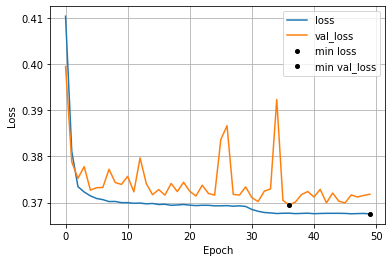

Minimum Loss             : 49    0.367532
Name: loss, dtype: float64

Minimum Validation Loss  : 36    0.369469
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history2)

Sweet spot berada pada epoch 36 dengan val_loss 0.369469

## **Deep Learning Wider Model with SGD Optimizer**

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
wider1 = Sequential()
wider1.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider1.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)

wider1.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
wider1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = wider1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
81081/81081 [==============================] - 53s 657us/step - loss: 0.4091 - val_loss: 0.3938
Epoch 2/50
81081/81081 [==============================] - 54s 670us/step - loss: 0.3979 - val_loss: 0.3947
Epoch 3/50
81081/81081 [==============================] - 55s 680us/step - loss: 0.3981 - val_loss: 0.4233
Epoch 4/50
81081/81081 [==============================] - 54s 668us/step - loss: 0.3974 - val_loss: 0.4019
Epoch 5/50
81081/81081 [==============================] - 52s 638us/step - loss: 0.3973 - val_loss: 0.4105
Epoch 6/50
81081/81081 [==============================] - 52s 638us/step - loss: 0.3978 - val_loss: 0.4083
Epoch 7/50
81081/81081 [==============================] - 52s 640us/step - loss: 0.4026 - val_loss: 0.3959
Epoch 8/50
81081/81081 [==============================] - 52s 640us/step - loss: 0.3973 - val_loss: 0.3914
Epoch 9/50
81081/81081 [==============================] - 52s 638us/step - loss: 0.3970 - val_loss: 0.4002
Epoch 10/50
81081/81081 [============

In [ ]:
predict_sgd = wider1.predict(X_test)
predict_sgd = predict_sgd.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_sgd)
mae = mean_absolute_error(y_test, predict_sgd)
r2 = r2_score(y_test, predict_sgd)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_sgd)))

MSE (Mean Squared Error)       : 0.3903205518784818
MAE (Mean Absolute Error)      : 0.4118011396275719
r^2 score                      : 0.610669604967566
RMSE (Root Mean Squared Error  : 0.6247563940276897


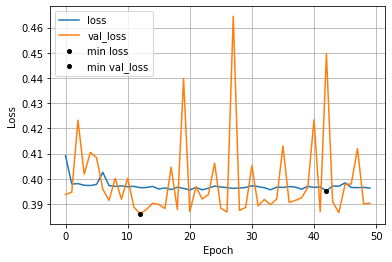

Minimum Loss             : 42    0.395204
Name: loss, dtype: float64

Minimum Validation Loss  : 12    0.38606
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history3)

Sweet spot berada pada epoch 12 dengan val_loss 0.38606

## **Deep Learning Wider Model with RMSprop Optimizer**

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
wider2 = Sequential()
wider2.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider2.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(learning_rate=0.001, momentum=0.9)

wider2.compile(loss='mean_squared_error', optimizer=opt)

wider2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history4 = wider2.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
81081/81081 [==============================] - 78s 959us/step - loss: 0.4029 - val_loss: 0.3822
Epoch 2/50
81081/81081 [==============================] - 81s 1ms/step - loss: 0.3973 - val_loss: 0.4003
Epoch 3/50
81081/81081 [==============================] - 78s 964us/step - loss: 0.3972 - val_loss: 0.3944
Epoch 4/50
81081/81081 [==============================] - 80s 983us/step - loss: 0.3971 - val_loss: 0.3838
Epoch 5/50
81081/81081 [==============================] - 79s 977us/step - loss: 0.3974 - val_loss: 0.4003
Epoch 6/50
81081/81081 [==============================] - 80s 986us/step - loss: 0.3976 - val_loss: 0.4289
Epoch 7/50
81081/81081 [==============================] - 78s 958us/step - loss: 0.3987 - val_loss: 0.4020
Epoch 8/50
81081/81081 [==============================] - 78s 960us/step - loss: 0.4002 - val_loss: 0.4011
Epoch 9/50
81081/81081 [==============================] - 77s 945us/step - loss: 0.4006 - val_loss: 0.4661
Epoch 10/50
81081/81081 [==============

In [ ]:
predict_rms = wider2.predict(X_test)
predict_rms = predict_rms.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_rms)
mae = mean_absolute_error(y_test, predict_rms)
r2 = r2_score(y_test, predict_rms)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_rms)))

MSE (Mean Squared Error)       : 0.3982013759775319
MAE (Mean Absolute Error)      : 0.42715909546468583
r^2 score                      : 0.6028087727749032
RMSE (Root Mean Squared Error  : 0.6310319928320053


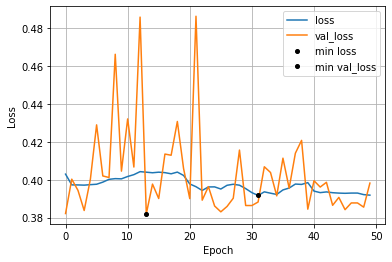

Minimum Loss             : 31    0.391689
Name: loss, dtype: float64

Minimum Validation Loss  : 13    0.381953
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history4)

Sweet spot berada pada epoch 13 dengan val_loss 0.381953

## **Kesimpulan**

Notebook terbagi dalam 2 folder yaitu folder Bottle_Deep_Learning_(Linear_Regression_&_Baseline_Layer) batch_size 8.ipynb dan folder Bottle_Deep_Learning_(Deeper,_Wider,_Wider_SGD,_Wider_RMSprop) batch_size 8.ipynb

1. R2 score model Linear Regression            : 0.3013722059652524
2. R2 score Deep Learning Model Baseline Layer : 0.6277056974119382
3. R2 score Deep Learning Model Deeper Layer   : 0.6343415821778486
4. R2 score Deep Learning Model Wider Layer   : 0.6291402098032308
5. R2 score Deep Learning Model Wider Layer SGD Optimizer   : 0.610669604967566
6. R2 score Deep Learning Model Wider Layer RMSprop Optimizer : 0.6028087727749032

Model terbaik adalah model Deep Learning dengan Deeper Layer dan Optimizer Adam walaupun nilai r2 scorenya masih berada di angka 0.63, mungkin dengan penambahan feature bisa meningkatkan nilai r2 scorenya. Setelah ini akan dilakukan training dengan batch size 64 dan 128 yang dapat ditemukan pada folder notebook Bottle_Deep_Learning_batch_size_64.ipynb dan Bottle_Deep_Learning_batch_size_128.ipynb